In [263]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

device = torch.device('cuda')

class MyDataset(Dataset):
    def __init__(self, x, y_train):
        super(MyDataset, self).__init__()
        self.x = x
        self.y_train = y_train

    def __len__(self):
        return self.y_train.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y_train[index]

In [272]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train = torch.tensor(X_train, dtype=torch.float64)
X_test = torch.tensor(X_test, dtype=torch.float64)
y_train = torch.tensor(y_train, dtype=torch.float64)
y_test = torch.tensor(y_test, dtype=torch.float64)

data = MyDataset(X_train, y_train)
trainloader = DataLoader(data, batch_size=64, shuffle=True)

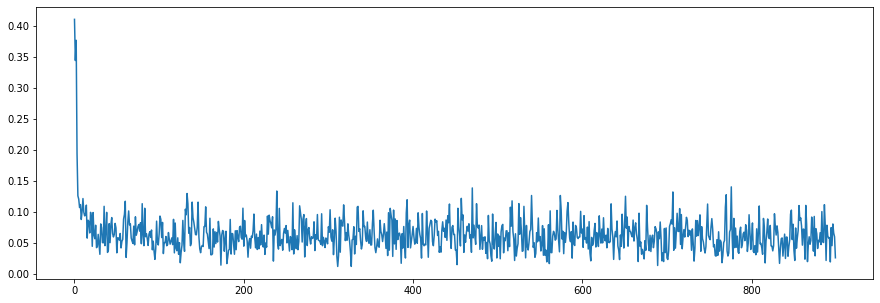

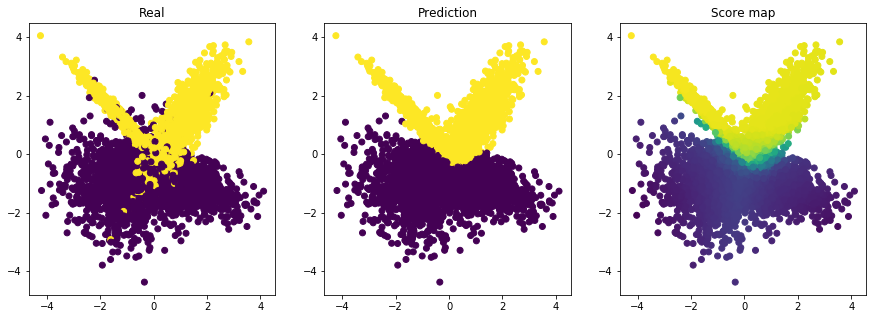

In [273]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 30),
    torch.nn.ReLU(),
    torch.nn.Linear(30, 10),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(10, 1),
)
model.double()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, weight_decay=1e-3)
epochs = 900
train_accuracy, losses = [], []


for epoch in range(epochs):
    optimizer.zero_grad()
    x, y = next(iter(trainloader))
    y.unsqueeze_(1)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)
    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
plt.plot(losses)
plt.show();

pred = np.where(model(X_train).squeeze().detach().numpy() > 0.5, 1, 0)
pred2 = model(X_train).squeeze().detach().numpy()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train.detach().numpy())
ax1.set_title('Real')
ax2.scatter(X_train[:, 0], X_train[:, 1], c=pred)
ax2.set_title('Prediction')
ax3.scatter(X_train[:, 0], X_train[:, 1], c=pred2)
ax3.set_title('Score map');